In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split

from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', 50) # Устанавливаем максимальное количество отображаемых столбцов равным 50
pd.set_option('display.max_rows', 20) # Устанавливаем максимальное количество отображаемых строк равным 20
pd.options.display.float_format = '{:.2f}'.format # Устанавливаем формат отображения чисел с двумя знаками после запятой
pd.options.mode.use_inf_as_na = True # Настройка режима Pandas для рассмотрения бесконечностей (inf) как пропущенных значений (NA)

# Конфигурация формата отображения графиков в виде векторных изображений
%config InlineBackend.figure_format = 'svg'

<ipython-input-3-f03a18f647e7>:4: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True # Настройка режима Pandas для рассмотрения бесконечностей (inf) как пропущенных значений (NA)


**Линейная регрессия** &mdash; это модель следующего вида:
$$a(x) = \langle w, x \rangle + w_0$$
где $w \in \mathbb{R}^d$, $w_0 \in \mathbb{R}$. Обучить линейную регрессию &mdash; значит найти $w = [w_1, w_2, ... , w_n]$ и $w_0$.

## Рассмотрим пример с выбросами в данных

In [ ]:
# Создание случайных данных с выбросами
np.random.seed(0)
n_samples = 100
X = np.random.rand(n_samples, 1) * 10
y = 2 * X.squeeze() + np.random.randn(n_samples) * 2
# Добавление выбросов
X[95:] = 10
y[95:] = -50

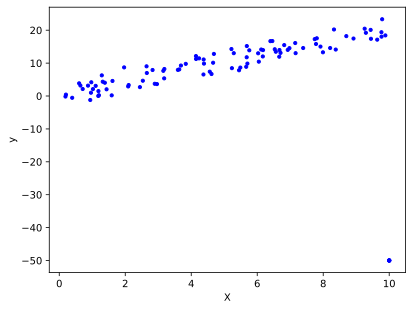

In [ ]:
# Построение графика
plt.scatter(X, y, color='blue', label='Data', s=10)

plt.xlabel('X')
plt.ylabel('y')
plt.show()

**Loss function**

$L(y, y_{pred}) = MSE = \frac{1}{N}\sum_{i=1}^N(y_i - y_i^{pred})^2, $

In [ ]:
# Линейная регрессия с MSE
reg_mse = LinearRegression()
reg_mse.fit(X, y)


LinearRegression()

**Loss function**

$L(y, y_{pred}) = \begin{cases}
\sum_{i=1}^N(\frac{1}{2}(y_i - y_i^{\text{pred}})^2, если  |y_i - y_i^{\text{pred}}| \leq \epsilon \\
\sum_{i=1}^N\epsilon|y_i - y_i^{\text{pred}}| - \frac{1}{2}\epsilon^2, если |y_i - y_i^{\text{pred}}| > \epsilon \\
\end{cases}$

In [ ]:
# Линейная регрессия с Huber функцией
reg_huber = HuberRegressor(epsilon=1.35)
reg_huber.fit(X, y)

HuberRegressor()

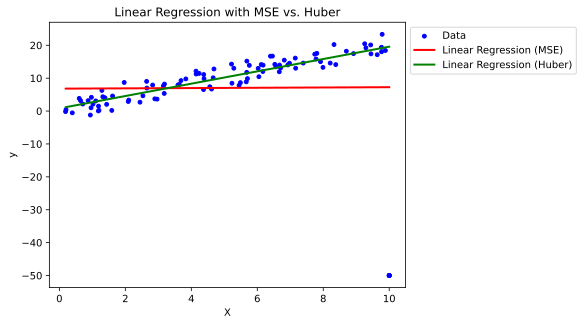

In [ ]:
# Построение графика
plt.scatter(X, y, color='blue', label='Data', s=15)
plt.plot(X, reg_mse.predict(X), color='red', linewidth=2, label='Linear Regression (MSE)')
plt.plot(X, reg_huber.predict(X), color='green', linewidth=2, label='Linear Regression (Huber)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with MSE vs. Huber')
plt.show()

# про переобучение

В  машинном обучение есть важное свойство "способность модели к обобщению", то есть способность модели работать хорошо на новых, неизвестных тестовых данных.

Если модель научилась идеально предсказывать выборку, на которой она обучалась,то чаще всего она не выявила никакой закономерности, а следовательно она не имеет практической ценности, такую модель будем называть переобученной



MSE on test data: 54323.85 and MSE on train data: 5.76


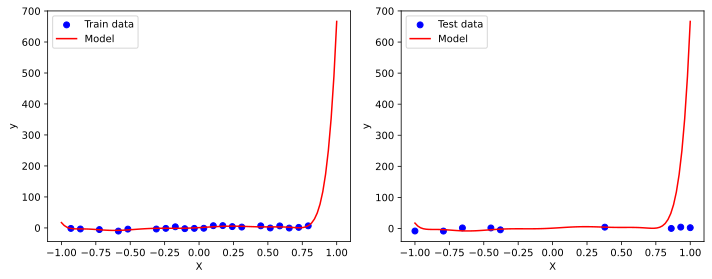

In [ ]:
# Генерация данных
X = np.linspace(-1, 1, 30)
np.random.seed(123)
y = 5*X + np.random.randn(*X.shape) * 3  # Добавляем  шум

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Преобразование данных с использованием полиномиальных признаков
degree = 10  # Степень полинома
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly_features.transform(X_test.reshape(-1, 1))

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Оценка модели на тестовых данных
y_test_pred = model.predict(X_test_poly)
y_train_pred = model.predict(X_train_poly)
mse_test = mean_squared_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
print(f"MSE on test data: {round(mse_test,2)} and MSE on train data: {round(mse_train,2)}")

# Генерация значений X для графиков
X_plot = np.linspace(-1, 1, 100)
X_plot_poly = poly_features.transform(X_plot.reshape(-1, 1))

# Печать графиков с помощью subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# График с обучающими данными и предсказаниями
ax[0].scatter(X_train, y_train, color='blue', label='Train data')
ax[0].plot(X_plot, model.predict(X_plot_poly), color='red', label='Model')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
ax[0].legend()

# График с тестовыми данными и предсказаниями
ax[1].scatter(X_test, y_test, color='blue', label='Test data')
ax[1].plot(X_plot, model.predict(X_plot_poly), color='red', label='Model')
ax[1].set_xlabel('X')
ax[1].set_ylabel('y')
ax[1].legend()

plt.tight_layout()
plt.show()


# Полиномиальная регрессия

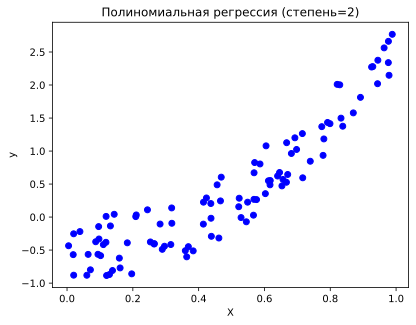

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Создание синтетических данных
np.random.seed(0)
X = np.random.rand(100, 1)
y = 3 * X**2  - np.random.rand(100, 1)

# Визуализация результатов
plt.scatter(X, y, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Полиномиальная регрессия (степень=2)')
plt.show()


In [ ]:
# Преобразование в матрицу признаков с полиномиальными признаками
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Обучение модели полиномиальной регрессии
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)


In [ ]:
# Обучение модели полиномиальной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
y_pred_lin = lin_reg.predict(X)

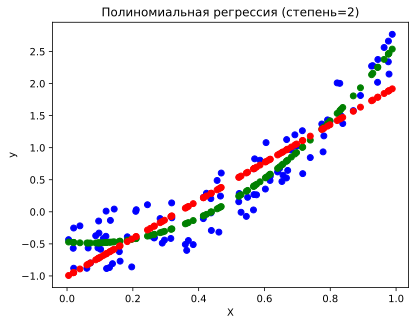

In [ ]:
# Визуализация результатов
plt.scatter(X, y, color='blue')
plt.scatter(X, y_pred_poly, color='green')
plt.scatter(X, y_pred_lin, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Полиномиальная регрессия (степень=2)')
plt.show()

# Логистическая регрессия

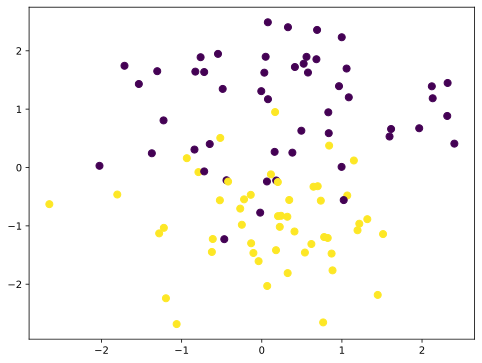

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Генерируем синтетические данные с линейно разделимыми классами
X, y = make_classification(n_samples=100, n_classes=2, random_state=42)


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y,  s=50);

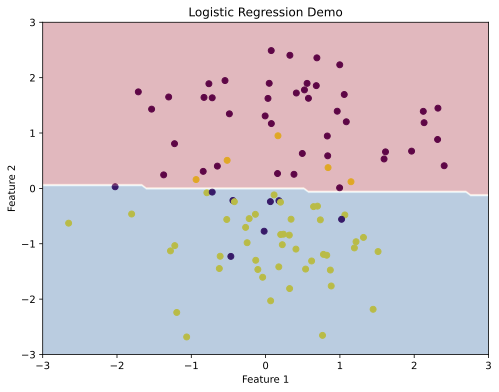

In [ ]:

# Создаем экземпляр модели логистической регрессии
model = LogisticRegression()

# Обучаем модель на данных
model.fit(X[:,[0,1]], y)

# Визуализируем данные и границу принятия решений
plt.figure(figsize=(8, 6))

# Визуализируем точки данных
plt.scatter(X[:, 0], X[:, 1], c=y)

# Создаем сетку для визуализации границы принятия решений
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Визуализируем границу принятия решений
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Demo')
plt.show()
